# Integrated Simulations

In [1]:
# To manipulate arrays
import pandas as pd
import pathlib
import sys
# Plotting
current_dir = pathlib.Path().absolute()
rsnaped_dir = current_dir.parents[0].joinpath('rsnaped')
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp

In [2]:

# Deffining directories
video_dir = current_dir.parents[0].joinpath('DataBases','CAP_IRES')
#video_dir = current_dir.parents[0].joinpath('DataBases','test_will')
#video_dir = current_dir.parents[0].joinpath('DataBases','12xSun-KDM5B___1xFLAG-12xSun-AlexX')
#video_dir = current_dir.parents[0].joinpath('DataBases','Hela')


In [3]:
current_dir.parents[0].joinpath('DataBases','CAP_IRES')

PosixPath('/home/luisub/Desktop/rsnaped/DataBases/CAP_IRES')

In [4]:
# Load videos 
path_files, list_files_paths, list_videos, num_videos = rsp.Utilities.read_files_in_directory(directory=video_dir, extension_of_files_to_look_for = 'tif',return_images_in_list=True)
max_frames_to_read = 100
list_videos[0] = list_videos[0][0:max_frames_to_read,:,:,:]

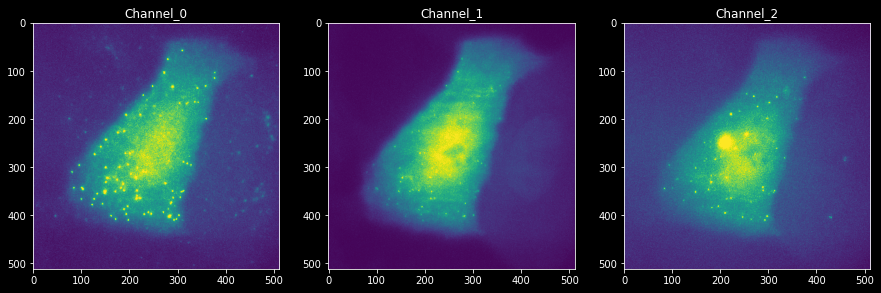

In [5]:
for i,vid in enumerate(list_videos):
    rsp.Plots.plot_image_channels(vid,selected_time_point = 0)

# Tracking

In [6]:
selected_channel_tracking = 0
selected_channel_segmentation = 1
intensity_calculation_method = 'disk_donut'  # options are : 'total_intensity' and 'disk_donut' 'gaussian_fit'
mask_selection_method = 'max_area'           # options are : 'max_spots' and 'max_area' 
use_optimization_for_tracking = 1            # 0 not using, 1 is using optimization
min_percentage_time_tracking = 0.2            # (normalized) minimum time to consider a trajectory.
particle_detection_size = 7                  # spot size for the simulation and tracking.
selected_channel = 0                         # Selected channel for tracking
average_cell_diameter = 200                    # cell diameter
intensity_threshold_tracking = None          # intensity threshold. If None, the code uses automatic detection # 
real_positions_dataframe = None #pd.read_csv(video_dir.joinpath('both_base_pb_KDM5B_P300_0.06_5.33333_video_cell_0.csv'))

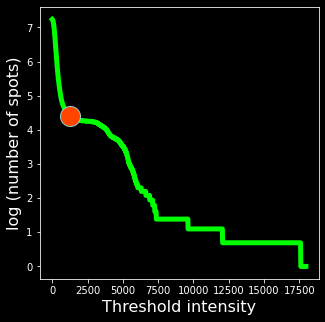

The number of detected trajectories is:  100
The selected intensity threshold is:  1259.0 

100


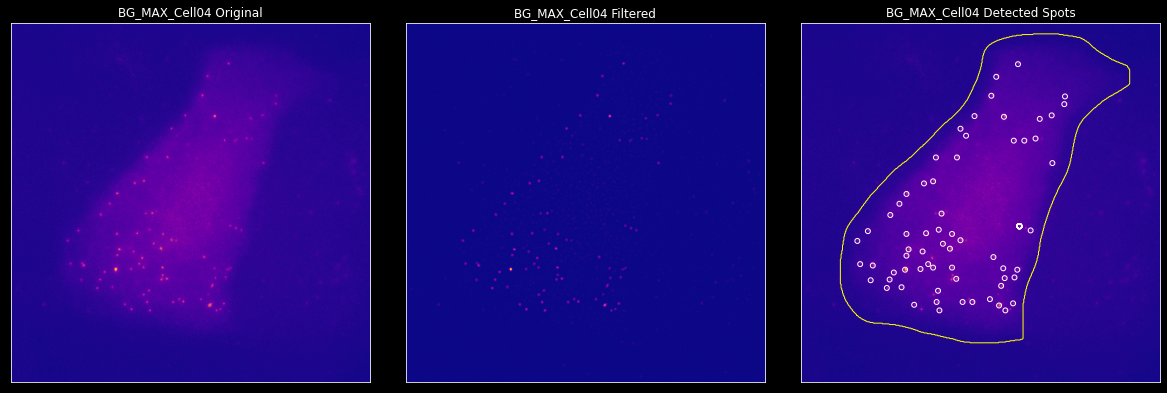

Progress:  1 / 1
Time to process data: 46  sec


In [7]:
list_DataFrame_tracking, list_array_intensities, list_time_vector, list_selected_mask = rsp.image_processing( files_dir_path_processing=video_dir,
                                                                                                            particle_size=particle_detection_size,
                                                                                                            selected_channel_tracking = selected_channel_tracking,
                                                                                                            selected_channel_segmentation = selected_channel_segmentation,
                                                                                                            intensity_calculation_method =intensity_calculation_method, 
                                                                                                            mask_selection_method = mask_selection_method,
                                                                                                            show_plot=True,
                                                                                                            use_optimization_for_tracking=use_optimization_for_tracking,
                                                                                                            real_positions_dataframe = real_positions_dataframe,
                                                                                                            average_cell_diameter=average_cell_diameter,
                                                                                                            print_process_times=False,
                                                                                                            min_percentage_time_tracking=min_percentage_time_tracking,
                                                                                                            dataframe_format='long')

In [8]:
df =list_DataFrame_tracking[0]


In [9]:
df

,image_number,cell_number,particle,frame,ch0_int_mean,ch1_int_mean,ch2_int_mean,ch0_int_std,ch1_int_std,ch2_int_std,...,y,ch0_SNR,ch1_SNR,ch2_SNR,ch0_bg_int_mean,ch1_bg_int_mean,ch2_bg_int_mean,ch0_bg_int_std,ch1_bg_int_std,ch2_bg_int_std
0,0,0,0,0,762.65,-65.74,-14.42,874.71,281.40,115.83,...,58,5.13,-0.23,-0.12,1110.90,2264.07,803.44,148.65,286.19,121.44
1,0,0,0,1,673.10,13.35,5.83,815.00,270.08,117.69,...,56,4.47,0.05,0.04,1172.14,2275.28,777.35,150.44,283.41,146.76
2,0,0,0,2,599.46,-82.10,13.04,726.73,233.62,139.60,...,57,3.48,-0.27,0.10,1166.91,2322.49,784.08,172.47,304.58,132.31
3,0,0,0,3,678.46,47.70,8.96,685.69,264.56,127.14,...,58,4.86,0.20,0.06,1171.47,2289.36,831.80,139.54,243.02,147.07
4,0,0,0,4,763.22,56.76,-9.26,1009.95,211.43,119.15,...,58,4.55,0.22,-0.06,1118.08,2310.32,792.62,167.71,263.98,149.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1785,0,0,99,19,-30.30,52.57,-23.68,204.82,426.92,282.50,...,329,-0.13,0.11,-0.09,2054.32,5054.17,2385.98,225.75,468.47,274.68
1786,0,0,99,20,-58.39,69.24,16.46,206.03,433.51,337.61,...,327,-0.24,0.17,0.06,2154.74,5256.05,2393.99,247.70,405.49,284.03
1787,0,0,99,22,-201.07,-131.64,-115.74,433.33,470.12,315.45,...,321,-0.26,-0.19,-0.21,2577.84,5804.46,2653.53,766.20,695.40,543.45
1788,0,0,99,23,-14.75,-164.85,-109.25,370.17,453.57,244.61,...,318,-0.02,-0.24,-0.33,2533.18,5997.64,2607.33,641.14,691.68,328.44
